In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
import lightgbm

import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
from pprint import pprint

import autogluon.eda.analysis as eda
import autogluon.eda.visualization as viz
import autogluon.eda.auto as auto

sns.set_theme(style='whitegrid')

ModuleNotFoundError: No module named 'altair'

# EDA Sources
- https://www.kaggle.com/code/masumrumi/a-statistical-analysis-ml-workflow-of-titanic

In [3]:
df_train = pd.read_csv('/Users/ashyrkou/Projects/Datasets/titanic/train.csv')
df_test = pd.read_csv('/Users/ashyrkou/Projects/Datasets/titanic/test.csv')
target_col = 'Survived'

common_args = dict(headers=True, fill=True)

Let's take a look at sample datasets.

In [4]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S


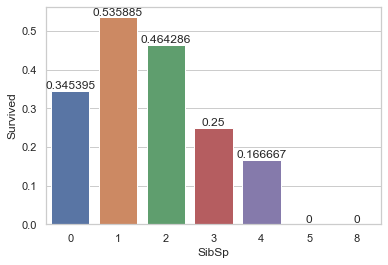

In [5]:
viz_args = dict(headers=True)
auto.analyze_interaction(
    x='SibSp', y='Survived', train_data=df_train, test_data=df_test, viz_args=viz_args
)

***

# Overview and Cleaning the Data

Datasets in the real world are often messy, However, this dataset is almost clean. Lets analyze and see what we have here.

In [6]:
analysis_args = dict(
    train_data=df_train,
    test_data=df_test,
    label='Survived',
    sample=None,
)

viz_args = dict(headers=True)

auto.analyze(**analysis_args, anlz_facets=[
    eda.dataset.DatasetSummary(),
    eda.dataset.MissingValuesAnalysis(),
    eda.dataset.RawTypesAnalysis(),
    eda.dataset.SpecialTypesAnalysis(),    
], viz_facets=[
    viz.DatasetStatistics(**viz_args),
    viz.DatasetTypeMismatch(**viz_args),
])

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_types,special_types
Age,714,88,,,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0,float64,177,0.198653,float,
Cabin,204,147,B96 B98,4,,,,,,,,object,687,0.771044,object,
Embarked,889,3,S,644,,,,,,,,object,2,0.002245,object,
Fare,891,248,,,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292,float64,,,float,
Name,891,891,"Braund, Mr. Owen Harris",1,,,,,,,,object,,,object,text
Parch,891,7,,,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0,int64,,,int,
PassengerId,891,891,,,446.0,257.353842,1.0,223.5,446.0,668.5,891.0,int64,,,int,
Pclass,891,3,,,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0,int64,,,int,
Sex,891,2,male,577,,,,,,,,object,,,object,
SibSp,891,7,,,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0,int64,,,int,


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_types,special_types
Age,332,79,,,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0,float64,86,0.205742,float,
Cabin,91,76,B57 B59 B63 B66,3,,,,,,,,object,327,0.782297,object,
Embarked,418,3,S,270,,,,,,,,object,,,object,
Fare,417,169,,,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292,float64,1,0.002392,float,
Name,418,418,"Kelly, Mr. James",1,,,,,,,,object,,,object,text
Parch,418,8,,,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0,int64,,,int,
PassengerId,418,418,,,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0,int64,,,int,
Pclass,418,3,,,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0,int64,,,int,
Sex,418,2,male,266,,,,,,,,object,,,object,
SibSp,418,7,,,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0,int64,,,int,


,train_data,test_data,warnings
Age,float,float,
Cabin,object,object,
Embarked,object,object,
Fare,float,float,
Name,object,object,
Parch,int,int,
PassengerId,int,int,
Pclass,int,int,
Sex,object,object,
SibSp,int,int,


It looks like, the features have unequal amount of data entries for every column and they have many different types of variables. This can happen for the following reasons...
* We may have missing values in our features.
* We may have categorical features. 
* We may have alphanumerical or/and text features. 


## Dealing with Missing values

We see that in both **train**, and **test** dataset have missing values. Let's make an effort to fill these missing values starting with "Embarked" feature. 

In [7]:
auto.analyze(**analysis_args, anlz_facets=[
    eda.dataset.MissingValuesAnalysis(),
], viz_facets=[
    viz.dataset.MissingValues(**viz_args),
    viz.DatasetStatistics(**viz_args),
])

,missing_count,missing_ratio
Age,177,0.198653
Cabin,687,0.771044
Embarked,2,0.002245


,missing_count,missing_ratio
Age,86,0.205742
Fare,1,0.002392
Cabin,327,0.782297


## Filling missing values in `Embarked`

It looks like there are only two null values( ~ 0.22 %) in the `Embarked` feature, we can replace these with the mode value "S". However, let's dig a little deeper. 

**Let's see what are those two null values**

In [8]:
df_train[df_train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We may be able to solve these two missing values by looking at other independent variables of the two raws. Both passengers paid a `Fare` of `$80`, are of `Pclass` `1` and `female` `Sex`. Let's see how the `Fare` is distributed among all `Pclass` and `Embarked` feature values

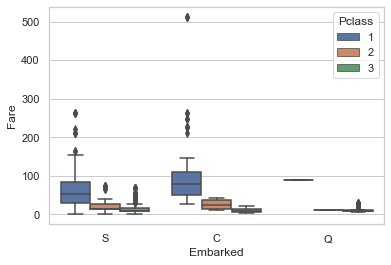

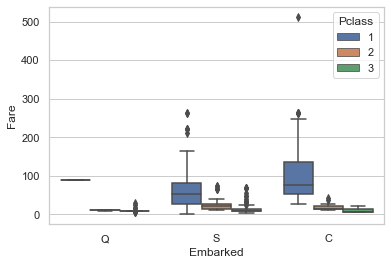

In [9]:
auto.analyze_interaction(x='Embarked', y='Fare', hue='Pclass', **analysis_args, viz_args=viz_args)

Here, in both training set and test set, the average `Fare` closest to `$80` are in the `C` `Embarked` values where `Pclass` is `1`. So, let's fill in the missing values as `C` 

## Filling missing values in `Cabin`

Approximately 77% of `Cabin` feature is missing in the training data and 78% missing on the test data. We have two choices,
* we can either get rid of the whole feature, or
* we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin record had a higher socio-economic-status then others. We may also say passengers with cabin record were more likely to be taken into consideration when loading into the boat.

Let's combine train and test data first and for now, will assign all the null values as "N"

In [10]:
all_data = pd.concat([df_train.drop(columns='Survived'), df_test], ignore_index=False).copy()
all_data.Cabin.fillna("N", inplace=True)

All the cabin names start with an English alphabet following by multiple digits. It seems like there are some passengers that had booked multiple cabin rooms in their name. This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name. 

In [11]:
all_data.Cabin = all_data.Cabin.str[0]

Now let's look at the value counts of the cabin features and see how it looks. 

In [12]:
pd.DataFrame({
    'count': all_data.Cabin.value_counts(),
    'percent': all_data.Cabin.value_counts(normalize=True).round(4)*100,
})

,count,percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


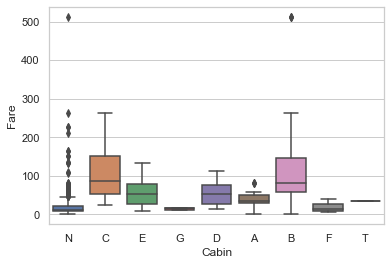

In [13]:
auto.analyze_interaction(x='Cabin', y='Fare', train_data=all_data, viz_args=viz_args)

The simplest approach would be to fill `Cabin` value the value closest to the `Fare` mean. It is recommended dropping `T` and `G` classes since they don't have enough samples.

In [14]:
pd.DataFrame({
    'count': all_data.Cabin.value_counts(),
    'percent': all_data.Cabin.value_counts(normalize=True).round(4)*100,
    'mean_Fare': all_data.groupby('Cabin').Fare.mean(),
}).sort_values('mean_Fare')

,count,percent,mean_Fare
G,5,0.38,14.205000
F,21,1.60,18.079367
N,1014,77.46,19.132707
T,1,0.08,35.500000
A,22,1.68,41.244314
D,46,3.51,53.007339
E,41,3.13,54.564634
C,94,7.18,107.926598
B,65,4.97,122.383078


More advanced approach would be to fit an imputer and let it fill the values

Let's see what predictors are important for `Cabin`:

Fitting using the following columns: ['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
  -> ['Cabin', 'Embarked', 'Fare', 'Pclass']


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.404494,0.560976,0.005010,0.002282,0.205134,0.005010,0.002282,0.205134,1,True,1
1,WeightedEnsemble_L2,0.404494,0.560976,0.007119,0.002670,0.207789,0.002109,0.000388,0.002655,2,True,2


<AxesSubplot:xlabel='importance', ylabel='index'>

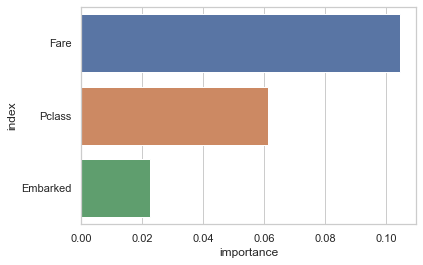

In [15]:
_data = all_data.copy()
_data.Cabin = _data.Cabin.replace({'N': np.nan})
cabin_imputer = auto.imputers.fit_imputer(
    path='/Users/ashyrkou/Temp/ag-titanic-cabin',
    df=_data,
    columns=['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch', 'Fare', 'Cabin'], 
#     columns=['Cabin', 'Fare', 'Pclass', 'SibSp'],
    label='Cabin',
#     show_all_stages=True,
    show_leaderboards=True,
    show_importance=True,
)

We can see the main predictors are `Pclass`, `Fare`, `SibSp` and `Embarked`; other features are not helpful. Let's refit only using the helpful ones.

Let's see distribution of imputed values

In [16]:
_data = all_data[all_data.Cabin == 'N'].copy()
_data.Cabin = cabin_imputer.predict(_data)

In [17]:
pd.DataFrame({
    'count': _data.Cabin.value_counts(),
    'percent': _data.Cabin.value_counts(normalize=True).round(4)*100,
})

,count,percent
F,947,93.39
C,37,3.65
B,11,1.08
A,9,0.89
D,7,0.69
E,3,0.30


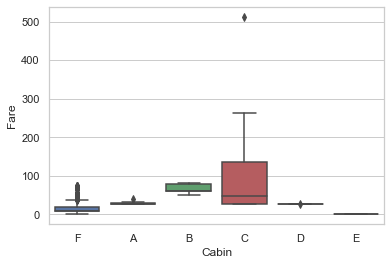

In [18]:
auto.analyze_interaction(x='Cabin', y='Fare', train_data=_data, viz_args=viz_args)

## Filling missing values in `Fare`

There is only one missing value in the fare column. Let's have it. 

In [19]:
df_test[df_test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


We can take the average of the `Fare` column to fill in the `NaN` value. However, for the sake of learning and practicing, we will try something else. We can take the average of the values where `Pclass` is `3`, `Sex` is `male` and `Embarked` is `S`

In [20]:
_data = all_data[
    (all_data.Pclass == 3) & 
    (all_data.Embarked == "S") & 
    (all_data.Sex == "male")
]
_data.Fare.mean()

13.145977260273972

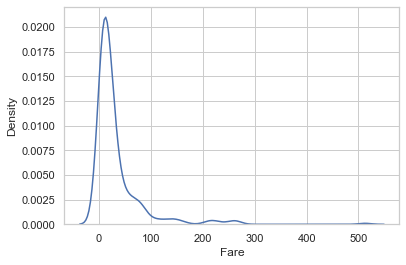

In [21]:
auto.analyze_interaction(x='Fare', train_data=all_data, viz_args=viz_args)

## Filling missing values in `Age`
We know that the feature "Age" is the one with most missing values, let's see it in terms of percentage. 

Fitting using the following columns: ['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
  -> ['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-12.091894,-12.923004,0.001409,0.001618,0.180463,0.001409,0.001618,0.180463,1,True,1
1,WeightedEnsemble_L2,-12.091894,-12.923004,0.002717,0.002026,0.183037,0.001308,0.000408,0.002574,2,True,2


<AxesSubplot:xlabel='importance', ylabel='index'>

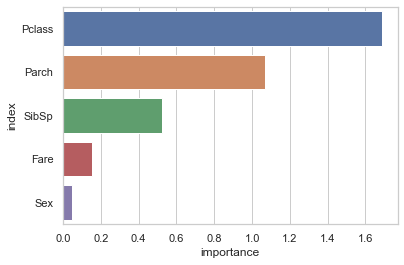

In [22]:
age_imputer = auto.imputers.fit_imputer(
    path='/Users/ashyrkou/Temp/ag-titanic-age',
    df=all_data,
    columns=['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch', 'Fare', 'Cabin'], 
    label='Age',
    show_leaderboards=True,
    show_importance=True,
)

In [23]:
_data = all_data[all_data.Age.isna()].copy()
_data.Age = age_imputer.predict(_data)

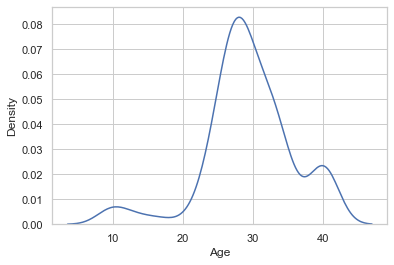

In [24]:
ax = sns.kdeplot(data=_data.Age)

***
# Visualization and Feature Relations

Before we dive into finding relations between independent variables and our dependent variable(survivor), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**
- Gender: More female survived than male
- Pclass: Higher socio-economic status passenger survived more than others. 
- Age: Younger passenger survived more than other passengers. 
- Fare: Passenger with higher fare survived more that other passengers. This can be quite correlated with Pclass. 

## Gender and Survived

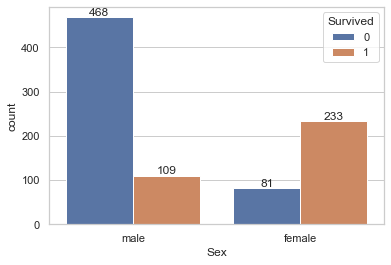

In [25]:
auto.analyze_interaction(x='Sex', hue='Survived', train_data=df_train, test_data=df_test)

- As we suspected, female passengers have survived at a much better rate than male passengers. 
- It seems about right since females and children were the priority. 

## Pclass and Survived

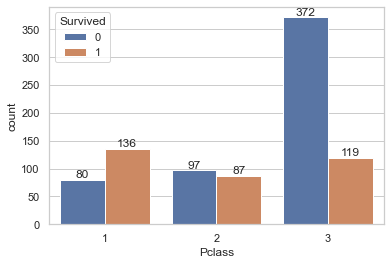

In [26]:
auto.analyze_interaction(x='Pclass', hue='Survived', train_data=df_train, test_data=df_test)

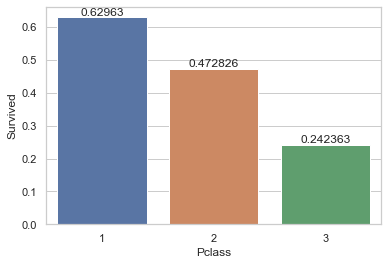

In [27]:
auto.analyze_interaction(x='Pclass', y='Survived', train_data=df_train, test_data=df_test)

- It looks like ...
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only 24% third class passenger survived.

## Fare and Survived

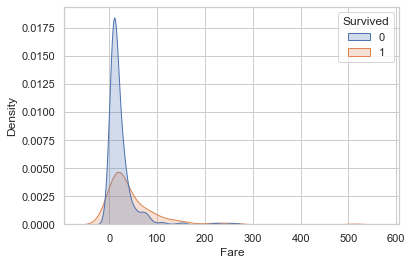

In [28]:
auto.analyze_interaction(
    x='Fare', hue='Survived', train_data=df_train, test_data=df_test, viz_args=dict(fill=True)
)

- The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive
- When fare is approximately more than 280 dollars, there is no blue shade which means, either everyone passed that fare point survived or maybe there is an outlier. Let's check

In [29]:
df_train[df_train.Fare > 280]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now.

## Age and Survived

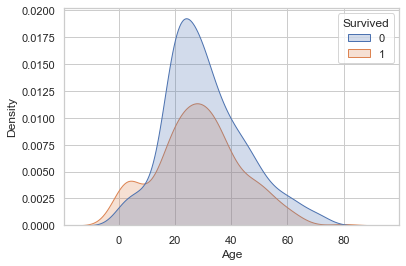

In [30]:
auto.analyze_interaction(
    x='Age', hue='Survived', train_data=df_train, test_data=df_test, viz_args=dict(fill=True)
)

There is nothing out of the ordinary about this plot, except the very left part of the distribution. This may hint on the posibility that children and infants were the priority.

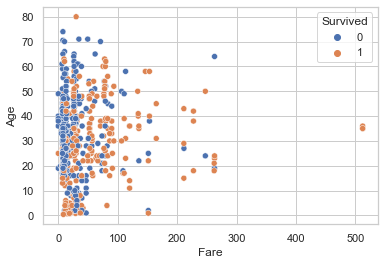

In [31]:
auto.analyze_interaction(
    x='Fare', y='Age', hue='Survived', train_data=df_train, test_data=df_test, viz_args=dict(fill=True)
)

- The grid above clearly demonstrates the three outliers with Fare of over \$500. At this point, I think we are quite confident that these outliers should be deleted.
- Most of the passengers were with in the Fare range of \$100.

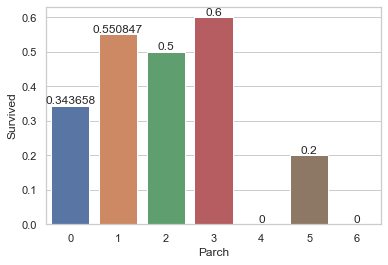

In [32]:
auto.analyze_interaction(
    x='Parch', y='Survived', train_data=df_train, test_data=df_test, viz_args=viz_args
)

Passenger who traveled in big groups with parents/children had less survival rate than other passengers.

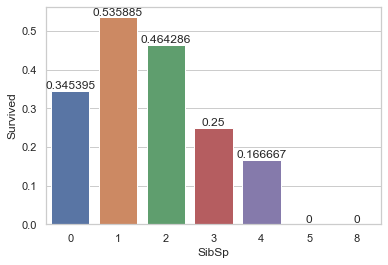

In [33]:
auto.analyze_interaction(
    x='SibSp', y='Survived', train_data=df_train, test_data=df_test, viz_args=viz_args
)

Passengers who traveled in small groups with sibilings/spouses had better changes of survivint than other passengers.

## Correlations

In [34]:
auto.analyze(train_data=df_train, test_data=df_test, label='Survived', anlz_facets=[
    eda.interaction.Correlation(significance=True, method='spearman'),
], viz_facets=[
    viz.interaction.CorrelationVisualization(fig_args=dict(figsize=(12,8)), **common_args),
])

# First model fitting

In [35]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from IPython.display import display

path='/Users/admin/Temp/ag-titanic-fit',


def fit_model(_df_train, path, target, fit_args={}):
    predictor = TabularPredictor(
        label=target,
        path=path,
        verbosity=0
    ).fit(
        _df_train,
        **fit_args,
    )
    return predictor


def fit_and_display_results(path, df_train, df_val, target_col, fit_args = {'hyperparameters':{'GBM': {}}}):
    predictor = fit_model(df_train[columns], path, target_col, fit_args)
    display(predictor.leaderboard(df_val, silent=True))
    if df_val is not None:
        importance = predictor.feature_importance(df_val.reset_index(drop=True))
        display(sns.barplot(data=importance.reset_index(), y='index', x='importance'))
    return predictor

    
def split_data(df, label, columns):
    _df_train = df[~df[label].isna()][columns].reset_index(drop=True)
    (_df_train, _df_val) = train_test_split(_df_train, random_state=0, test_size=0.3)    
    return _df_train, _df_val

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.820896,0.784,0.003942,0.003226,0.204563,0.003942,0.003226,0.204563,1,True,1
1,WeightedEnsemble_L2,0.820896,0.784,0.005248,0.003767,0.206898,0.001306,0.000541,0.002335,2,True,2


<AxesSubplot:xlabel='importance', ylabel='index'>

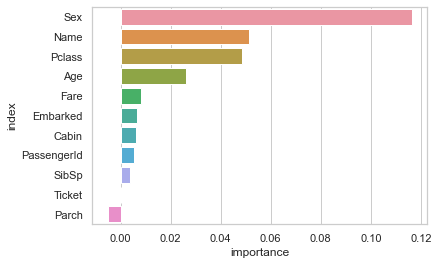

In [36]:
columns = df_train.columns
_df_train, _df_val = split_data(df_train, target_col, columns)
fit_and_display_results(path, _df_train, _df_val, target_col)

### Remove unhelpful columns

In [37]:
drop_cols = ['Ticket', 'PassengerId']

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.80597,0.784,0.006965,0.003969,0.265966,0.006965,0.003969,0.265966,1,True,1
1,WeightedEnsemble_L2,0.80597,0.784,0.008836,0.004599,0.268856,0.001871,0.000630,0.002890,2,True,2


<AxesSubplot:xlabel='importance', ylabel='index'>

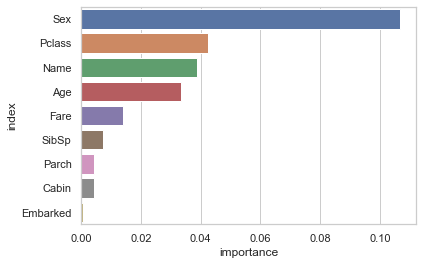

In [38]:
columns = [c for c in df_train.columns if c not in drop_cols]
_df_train, _df_val = split_data(df_train, target_col, columns)
fit_and_display_results(path, _df_train, _df_val, target_col)

### Filling missing

In [39]:
def prepare_clean_data(df_train, df_test, columns):
    _df_train = df_train.copy()
    _df_test = df_test.copy()

    cols_to_drop = ['Ticket', 'PassengerId']

    for df in [_df_train, _df_test]:
        df.loc[df.Embarked.isna(), 'Embarked'] = 'C'

        df.Cabin = df.Cabin.str[0]
        df.loc[df.Cabin.isna(), 'Cabin'] = cabin_imputer.predict(df[df.Cabin.isna()])

        df.loc[df.Fare.isna(), 'Fare'] = 13.14

        df.loc[df.Age.isna(), 'Age'] = age_imputer.predict(df[df.Age.isna()])
    
    _df_train, _df_val = split_data(_df_train, target_col, columns)
    
    return _df_train, _df_val, _df_test

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.83209,0.768,0.004225,0.002729,0.199549,0.004225,0.002729,0.199549,1,True,1
1,WeightedEnsemble_L2,0.83209,0.768,0.005770,0.003282,0.202214,0.001545,0.000553,0.002665,2,True,2


<AxesSubplot:xlabel='importance', ylabel='index'>

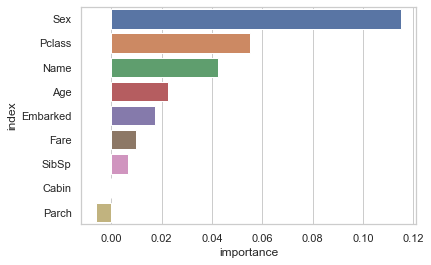

In [40]:
columns = [c for c in df_train.columns if c not in drop_cols]
_df_train, _df_val, _df_test = prepare_clean_data(df_train, df_test, columns)
fit_and_display_results(path, _df_train, _df_val, target_col)

# Feature engineering

## Title

In [41]:
titles = all_data.Name.str.split('.').str[0].str.split(', ').str[1]
counts = titles.value_counts()

mapping = {k: k if v > 8 else '--other--' for k, v in counts.items()}
mapping['Mlle'] = 'Miss'
mapping['Ms'] = 'Miss'
mapping

{'Mr': 'Mr',
 'Miss': 'Miss',
 'Mrs': 'Mrs',
 'Master': 'Master',
 'Rev': '--other--',
 'Dr': '--other--',
 'Col': '--other--',
 'Mlle': 'Miss',
 'Major': '--other--',
 'Ms': 'Miss',
 'Lady': '--other--',
 'Sir': '--other--',
 'Mme': '--other--',
 'Don': '--other--',
 'Capt': '--other--',
 'the Countess': '--other--',
 'Jonkheer': '--other--',
 'Dona': '--other--'}

In [42]:
for df in [_df_train, _df_val, _df_test]:
    df['title'] = df.Name.str.split('.').str[0].str.split(', ').str[1].map(mapping)

## family_size

In [43]:
for df in [_df_train, _df_val, _df_test]:
    df['family_size'] = df.SibSp + df.Parch + 1
    df['is_alone'] = df['family_size'] == 1
    df['calculated_fare'] = df.Fare / df.family_size

# Fit with new features and ensemble

/Users/ashyrkou/Projects/venv-ag/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge_BAG_L1,0.850746,0.831461,0.031159,0.016109,1.972014,0.031159,0.016109,1.972014,1,True,13
1,XGBoost_BAG_L1,0.847015,0.831461,0.048010,0.028031,1.190372,0.048010,0.028031,1.190372,1,True,11
2,LightGBM_BAG_L1,0.843284,0.841091,0.025233,0.018554,1.091738,0.025233,0.018554,1.091738,1,True,4
3,RandomForestGini_BAG_L1,0.835821,0.791332,0.057465,0.082567,0.429896,0.057465,0.082567,0.429896,1,True,5
4,RandomForestEntr_BAG_L1,0.832090,0.791332,0.059224,0.084254,0.335979,0.059224,0.084254,0.335979,1,True,6
5,ExtraTreesGini_BAG_L1,0.832090,0.799358,0.077333,0.081810,0.337128,0.077333,0.081810,0.337128,1,True,8
6,ExtraTreesEntr_BAG_L1,0.828358,0.797753,0.076134,0.134181,0.336390,0.076134,0.134181,0.336390,1,True,9
7,NeuralNetFastAI_BAG_L1,0.828358,0.841091,0.130079,0.065161,4.863758,0.130079,0.065161,4.863758,1,True,10
8,CatBoost_BAG_L1,0.820896,0.842697,0.015654,0.017525,2.770791,0.015654,0.017525,2.770791,1,True,7
9,WeightedEnsemble_L2,0.820896,0.842697,0.016962,0.018597,3.256540,0.001308,0.001072,0.485749,2,True,14


<AxesSubplot:xlabel='importance', ylabel='index'>

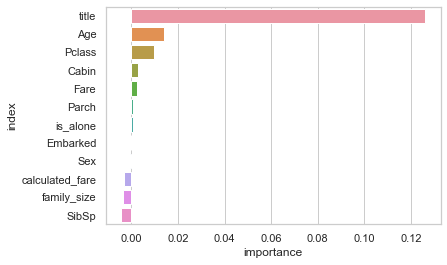

In [44]:
columns = [c for c in _df_train.columns if c not in ['Name', *drop_cols]]
fit_and_display_results(
    path, _df_train[columns], _df_val[columns], target_col, 
    fit_args={'presets': 'best_quality'}
)

### Refit on all training data

In [45]:
columns = [c for c in _df_train.columns if c not in ['Name', 'SibSp', 'family_size', 'calculated_fare', *drop_cols]]

predictor = fit_and_display_results(
    path, pd.concat([_df_train, _df_val], ignore_index=True)[columns], None, target_col, 
    fit_args={'presets': 'best_quality'}
)

[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.855219,0.104064,8.258434,0.001402,0.551211,2,True,14
1,LightGBM_BAG_L1,0.852974,0.022157,1.717012,0.022157,1.717012,1,True,4
2,XGBoost_BAG_L1,0.850730,0.041654,1.803677,0.041654,1.803677,1,True,11
3,NeuralNetTorch_BAG_L1,0.846240,0.089587,15.689412,0.089587,15.689412,1,True,12
4,NeuralNetFastAI_BAG_L1,0.838384,0.080505,5.990211,0.080505,5.990211,1,True,10
5,CatBoost_BAG_L1,0.837262,0.018500,3.658270,0.018500,3.658270,1,True,7
6,LightGBMLarge_BAG_L1,0.835017,0.023165,3.396240,0.023165,3.396240,1,True,13
7,LightGBMXT_BAG_L1,0.813692,0.024235,1.510813,0.024235,1.510813,1,True,3
8,ExtraTreesEntr_BAG_L1,0.804714,0.088706,0.342178,0.088706,0.342178,1,True,9
9,RandomForestEntr_BAG_L1,0.803591,0.091503,0.343468,0.091503,0.343468,1,True,6


In [46]:
df_submission = _df_test[['PassengerId']].copy()
df_submission[target_col] = predictor.predict(_df_test)

[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

# Model Analysis

In [47]:
import autogluon.eda.visualization

In [48]:
import autogluon.eda.analysis as eda
import autogluon.eda.visualization as viz

[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

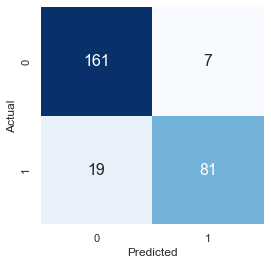

,importance,stddev,p_value,n,p99_high,p99_low
Pclass,0.138806,0.008908,2.024780e-06,5,0.157149,0.120463
Sex,0.103731,0.015475,5.771389e-05,5,0.135594,0.071868
Age,0.081343,0.016561,1.952799e-04,5,0.115444,0.047243
Fare,0.080597,0.004254,9.281992e-07,5,0.089357,0.071837
title,0.053731,0.008986,9.048191e-05,5,0.072234,0.035229
Cabin,0.011940,0.003122,5.130916e-04,5,0.018368,0.005512
is_alone,0.011194,0.003731,1.285130e-03,5,0.018877,0.003511
Parch,0.009701,0.003337,1.445004e-03,5,0.016573,0.002830
Embarked,0.007463,0.007463,4.450467e-02,5,0.022828,-0.007903


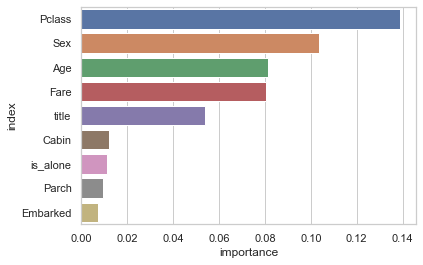

In [85]:
analysis_args = dict(
    model=predictor,
    label='Survived',
    val_data=_df_val,
    sample=None,
)

viz_args = dict(headers=True)

auto.analyze(**analysis_args, anlz_facets=[
    eda.model.AutoGluonModelEvaluator(),
], viz_facets=[
    viz.model.ConfusionMatrix(fig_args=dict(figsize=(4,4)), annot_kws={"size": 16}, **viz_args),
    viz.model.FeatureImportance(show_barplots=True, **viz_args)
])

In [88]:
!pwd

/Users/ashyrkou
